## Port6 Data Challenge Report
Below is my report showing my approach, thought process, and results for the Port6 data challenge. I have tried to include as much information as possible but if there is anything unclear please feel free to reach out to me.

In [2]:
import joblib

features, labels = joblib.load('data.dat')
n_batches = len(features)
print(n_batches)


51


In [3]:
for i in range(len(features)):
    print(f"Feature {i+1} has shape {features[i].shape}")

Feature 1 has shape (4979, 30)
Feature 2 has shape (4966, 30)
Feature 3 has shape (4944, 30)
Feature 4 has shape (4966, 30)
Feature 5 has shape (4966, 30)
Feature 6 has shape (4958, 30)
Feature 7 has shape (5000, 30)
Feature 8 has shape (5000, 30)
Feature 9 has shape (4937, 30)
Feature 10 has shape (4959, 30)
Feature 11 has shape (5000, 30)
Feature 12 has shape (5000, 30)
Feature 13 has shape (5000, 30)
Feature 14 has shape (5000, 30)
Feature 15 has shape (5000, 30)
Feature 16 has shape (5000, 30)
Feature 17 has shape (5000, 30)
Feature 18 has shape (4974, 30)
Feature 19 has shape (5000, 30)
Feature 20 has shape (5000, 30)
Feature 21 has shape (5000, 30)
Feature 22 has shape (5000, 30)
Feature 23 has shape (5000, 30)
Feature 24 has shape (5000, 30)
Feature 25 has shape (5000, 30)
Feature 26 has shape (5000, 30)
Feature 27 has shape (5000, 30)
Feature 28 has shape (5000, 30)
Feature 29 has shape (5000, 30)
Feature 30 has shape (5000, 30)
Feature 31 has shape (5000, 30)
Feature 32 has sh

In [6]:
for i in range(len(labels)):
    print(f"Label {i+1} has shape {labels[i].shape}")

Label 1 has shape (4979, 5)
Label 2 has shape (4966, 5)
Label 3 has shape (4944, 5)
Label 4 has shape (4966, 5)
Label 5 has shape (4966, 5)
Label 6 has shape (4958, 5)
Label 7 has shape (5000, 5)
Label 8 has shape (5000, 5)
Label 9 has shape (4937, 5)
Label 10 has shape (4959, 5)
Label 11 has shape (5000, 5)
Label 12 has shape (5000, 5)
Label 13 has shape (5000, 5)
Label 14 has shape (5000, 5)
Label 15 has shape (5000, 5)
Label 16 has shape (5000, 5)
Label 17 has shape (5000, 5)
Label 18 has shape (4974, 5)
Label 19 has shape (5000, 5)
Label 20 has shape (5000, 5)
Label 21 has shape (5000, 5)
Label 22 has shape (5000, 5)
Label 23 has shape (5000, 5)
Label 24 has shape (5000, 5)
Label 25 has shape (5000, 5)
Label 26 has shape (5000, 5)
Label 27 has shape (5000, 5)
Label 28 has shape (5000, 5)
Label 29 has shape (5000, 5)
Label 30 has shape (5000, 5)
Label 31 has shape (5000, 5)
Label 32 has shape (5000, 5)
Label 33 has shape (5000, 5)
Label 34 has shape (5000, 5)
Label 35 has shape (500

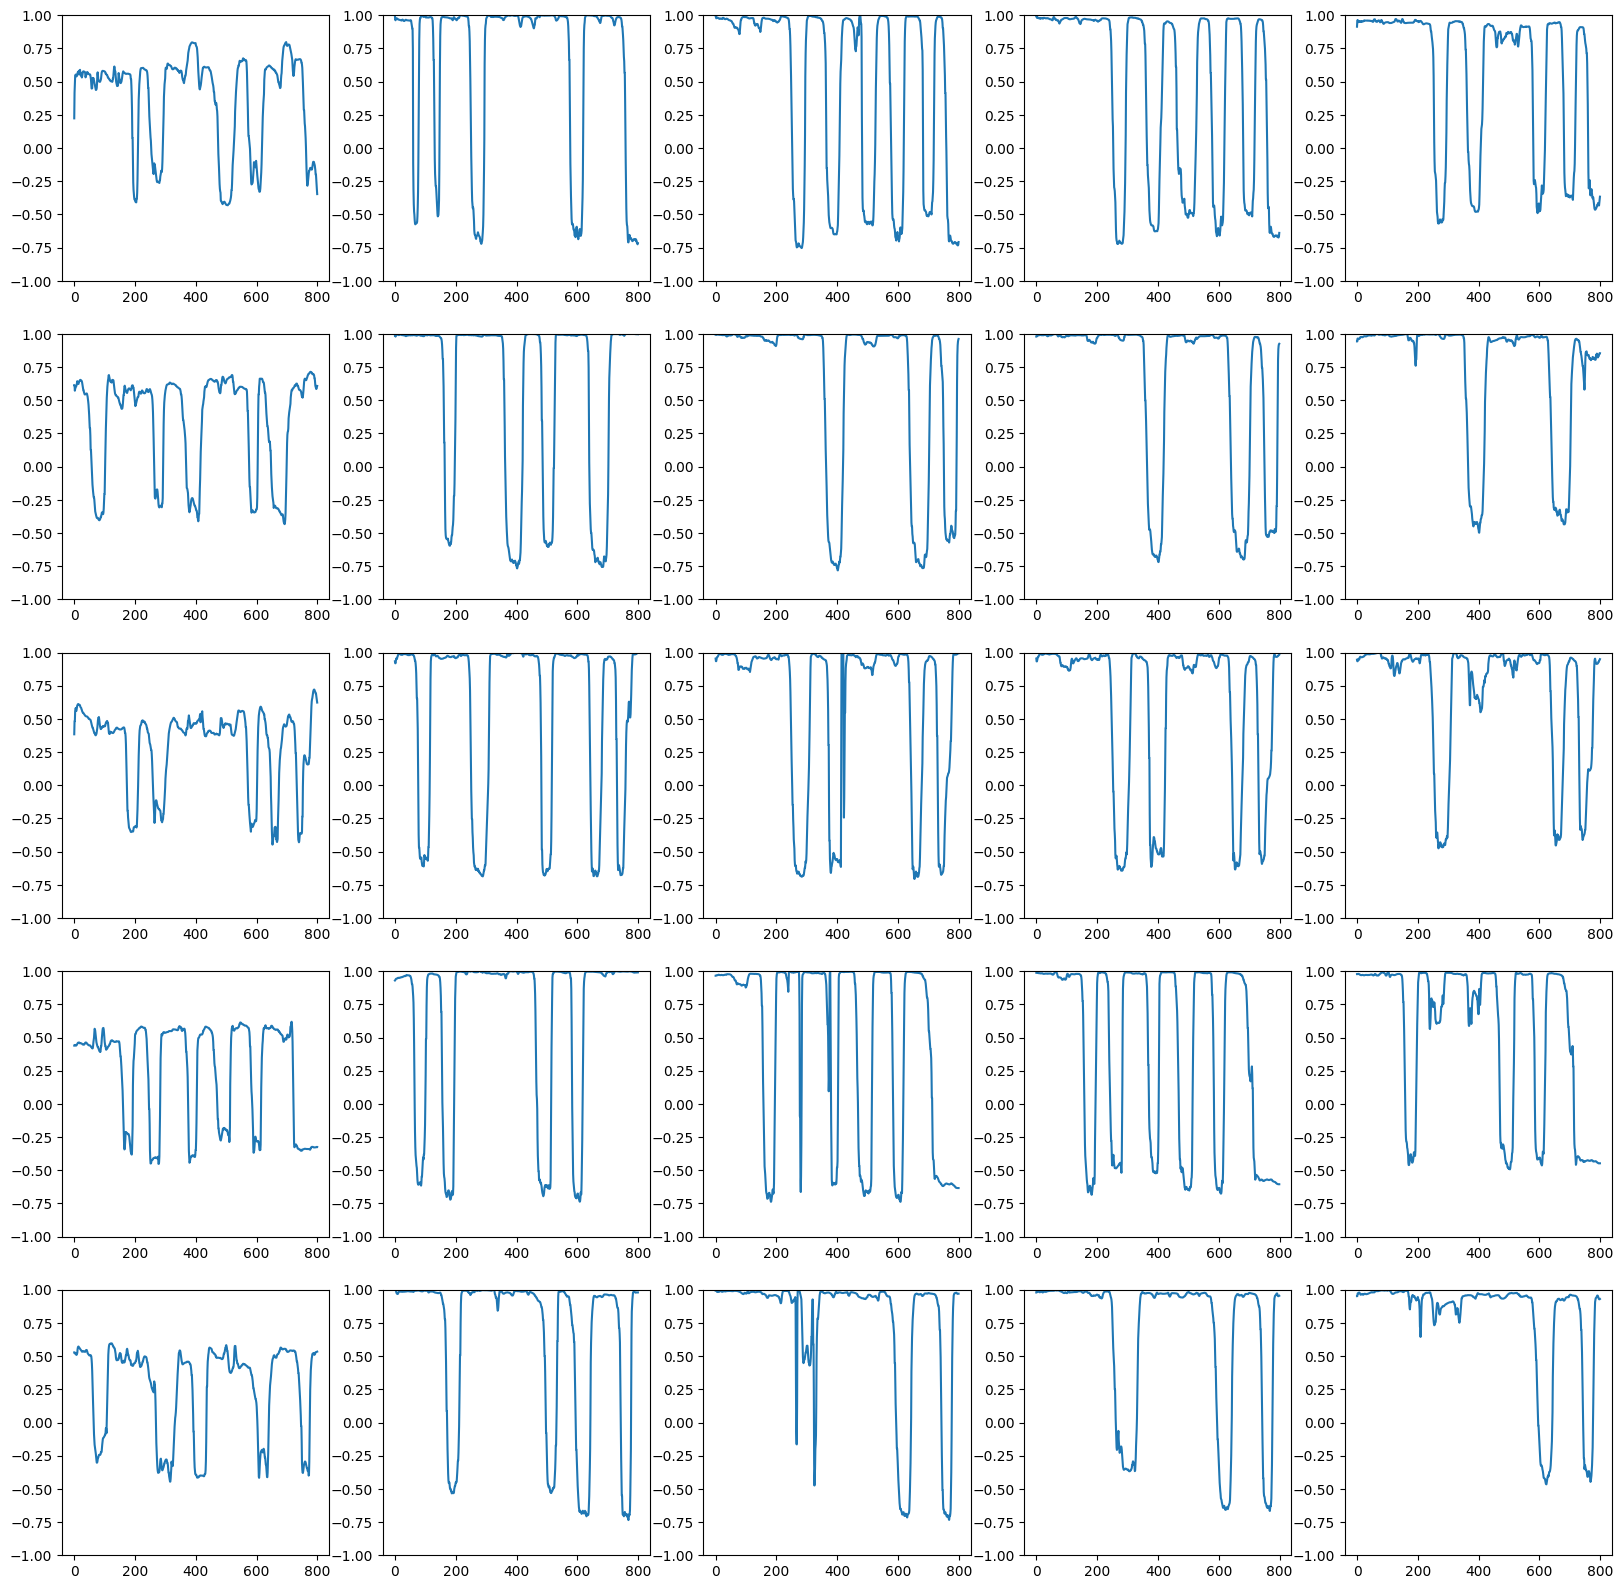

In [7]:
import matplotlib.pyplot as plt

batches = [0,2,4,6,8]
unit = 4 # Unit size of plots
plt.figure(figsize=(5*unit, len(batches)*unit))
for i in range(len(batches)):
    for j in range(5):
        y = labels[batches[i]][:800,j]
        plt.subplot(5, 5, i*5 + j+1)
        plt.ylim([-1, 1])
        plt.plot(list(range(len(y))),y)
plt.show()

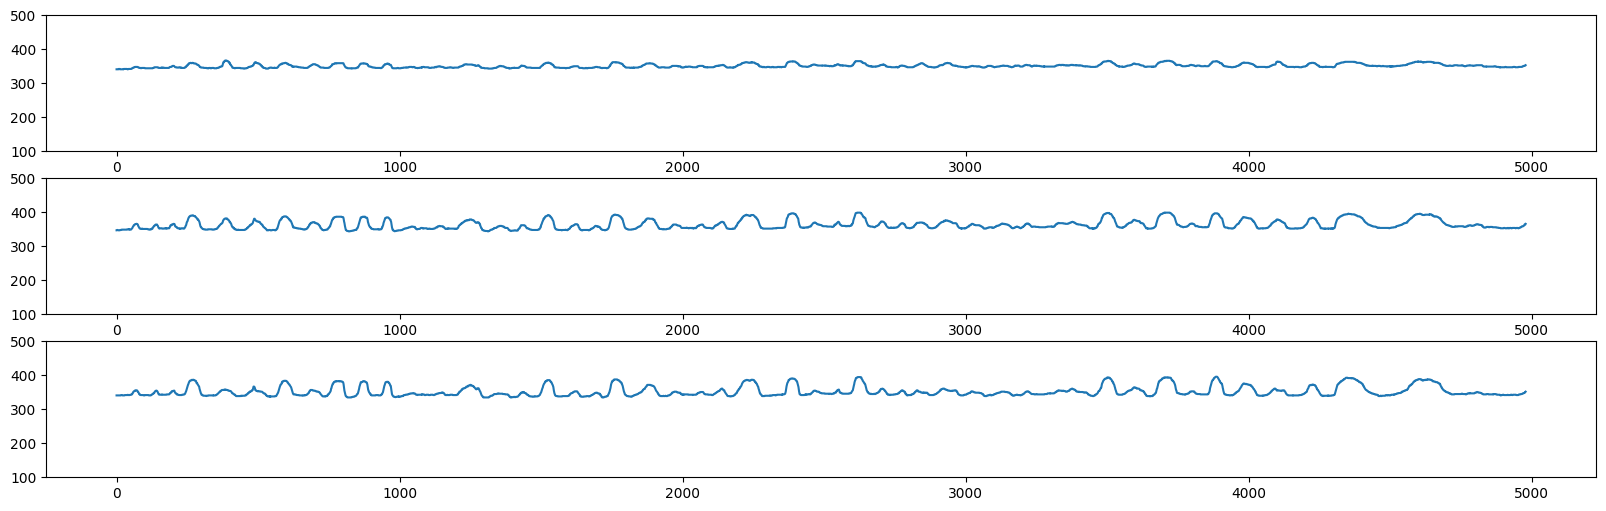

In [9]:
# num_features = features[0].shape[1]
num_features = 3  # Just showing the first 3 features of the first batch for brevity of the report
plt.figure(figsize=(5*unit, num_features*unit/2))
for i in range(num_features):
    y = features[0][:,i]
    plt.subplot(num_features, 1, i+1)
    plt.ylim([100, 500])
    plt.plot(list(range(len(y))), y)
plt.show()

In [10]:
# Find correlation between features
import torch

# Just take first 8 features
samples = torch.tensor(features[0]).t()[:8,:]  # Shape 8 x 5000

# Matrix of Pearson's correlation coefficient
cov_mat = torch.corrcoef(samples)
print(cov_mat)

# There seem to be quite a lot of correlation between the 30 features

tensor([[1.0000, 0.9567, 0.9052, 0.8126, 0.7380, 0.6544, 0.3450, 0.5377],
        [0.9567, 1.0000, 0.9818, 0.9167, 0.8575, 0.7797, 0.4352, 0.5834],
        [0.9052, 0.9818, 1.0000, 0.9640, 0.9120, 0.8061, 0.4025, 0.5231],
        [0.8126, 0.9167, 0.9640, 1.0000, 0.9826, 0.8748, 0.4381, 0.4961],
        [0.7380, 0.8575, 0.9120, 0.9826, 1.0000, 0.9130, 0.4881, 0.5098],
        [0.6544, 0.7797, 0.8061, 0.8748, 0.9130, 1.0000, 0.7860, 0.7488],
        [0.3450, 0.4352, 0.4025, 0.4381, 0.4881, 0.7860, 1.0000, 0.9053],
        [0.5377, 0.5834, 0.5231, 0.4961, 0.5098, 0.7488, 0.9053, 1.0000]],
       dtype=torch.float64)


In [ ]:
## MORE STATISTIC SHOWING THE CLAIMS BELOW

## Exploratory Data Analysis
I have performed some data analysis above to get familiarity with the data. Outcomes are found below:
- Data collected at 50Hz for ~100 seconds, so ~5000 samples in total in each batch. There are 51 batches.
- Input data is from reflective optical sensors from the wrist area and has 30 dimensions, taking values with 10-bit resolution (0 ~ 1024) but mostly in range 100 - 500.
- Label data has 5 dimensions (one for each finger) and the value is calculated as a dot product between 2 (normalized) vectors (-1 ~ 1).
- Fingers 1-4 (indices) seem to mostly stay at 1 and when flexed will go down to -0.75.
- Finger 0 (ie. the thumb) has more variance ranging between 0.5 and -0.5.
- There seem to be a data imbalance (lots of data on the extreme values).
- There seem to be a lot of correlation between features, as evident in the Pearson's correlation coefficient matrix. All values are positive and take high values, indicating high correlation.

Assumptions:
- We can assume that during data collection, the fingers are pointing straight forward (as given in the problem)



## Framing the Problem

We want to take in sensor data and predict finger vectors (5-tuple of floats between [-1,1])

Success will have low regression error between predicted value and ground truth. Some common metrics coming to mind include:
- MSE (Mean Squared Error)
- RMSE
- MAE (Mean Absolute Error)
For this report I'll be mainly using MSE, as it's very easy to calculate. Although MAE is more robust to outliers, I actually think models should be penalised for larger errors more than smaller errors, as getting the angle slightly wrong is more benine than predicting fingers are flexed when they are not.

Other nuances when comparing models:
- We need models that are light-weight and fast. This is not only due to hardware constraints during deployment, but also the user experience using our algorithms. We want fast online inference time otherwise our model predictions will "lag" behind user input
- We also need to consider which fingers are more important
- We also need to consider the variance of the loss. We may want to pick a model with slight higher MSE but lower variance of loss.


## Feature Selection

The 30 features from the sensors make a good starting point.


## Model Selection

As this is a regression problem, we will be using regression models. 

Model tradeoffs to consider
- Accuracy (that's the MSE as described before)
- Interpretability, though it's not as important as hand prediction does not (yet) directly make critical decisions
- Model complexity, simpler and faster models are preferred as explained previously

I will begin by establishing a baseline model and then optimize from there.